In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import datetime as dt

[*********************100%***********************]  1 of 1 completed


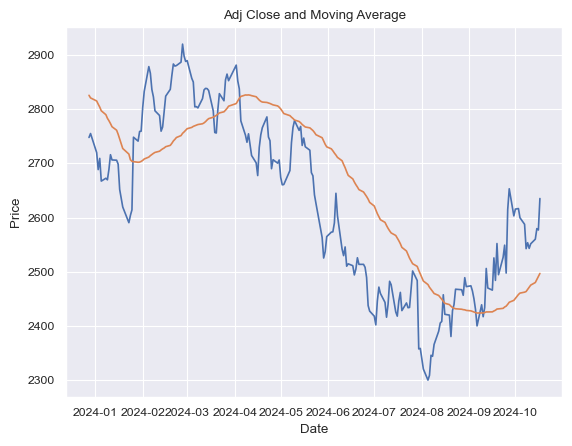

In [26]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(1*365)

dataDGE = yf.download('DGE.L',start=startDate,end=endDate)

def stock_moving_average(closeData, window_size):
    closeData['Moving Average'] = closeData['Adj Close'].rolling(window=window_size).mean()
    return closeData

dataDGE = stock_moving_average(dataDGE,50)
dataDGE = dataDGE.dropna(subset=['Adj Close', 'Moving Average'])


x_data = dataDGE.index
y_data = dataDGE[['Adj Close','Moving Average']]

plt.plot(x_data,y_data)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Adj Close and Moving Average')
plt.show()


In [2]:
azn = yf.Ticker("AZN.L")
hist = azn.history(period="1y")

print(hist.head())

                                   Open          High           Low  \
Date                                                                  
2023-10-17 00:00:00+01:00  10761.948327  11061.380605  10675.837084   
2023-10-18 00:00:00+01:00  10936.128200  11002.668708  10366.186847   
2023-10-19 00:00:00+01:00  10311.821374  10423.374575  10215.924762   
2023-10-20 00:00:00+01:00  10249.195271  10307.907484  10141.556214   
2023-10-23 00:00:00+01:00  10239.410087  10296.165227   9865.608992   

                                  Close   Volume  Dividends  Stock Splits  
Date                                                                       
2023-10-17 00:00:00+01:00  11028.110352  2225240        0.0           0.0  
2023-10-18 00:00:00+01:00  10384.233398  3678685        0.0           0.0  
2023-10-19 00:00:00+01:00  10262.894531  2131732        0.0           0.0  
2023-10-20 00:00:00+01:00  10206.139648  2024298        0.0           0.0  
2023-10-23 00:00:00+01:00   9883.222656  21811

In [3]:
df_azn = pd.DataFrame(hist)
df_azn_clean = df_azn.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
df_azn_clean.head()

,Close
Date,
2023-10-17 00:00:00+01:00,11028.110352
2023-10-18 00:00:00+01:00,10384.233398
2023-10-19 00:00:00+01:00,10262.894531
2023-10-20 00:00:00+01:00,10206.139648
2023-10-23 00:00:00+01:00,9883.222656


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

<Axes: xlabel='Date', ylabel='Close'>

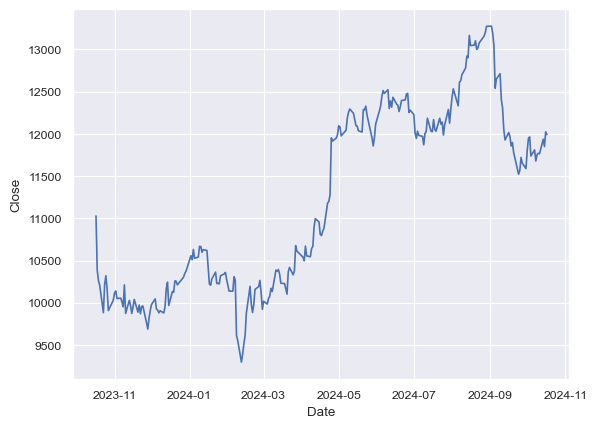

In [4]:
sns.set_theme("paper")
sns.lineplot(data=df_azn_clean, x="Date", y="Close")

In [5]:
def current_multiple_comparison(*tickers):
    tickers_array = []
    for ticker in tickers:
        tickers_array.append(ticker)    

    valuation_data = {}

    for ticker in tickers_array:
        stock = yf.Ticker(ticker)
        info = stock.info

        pe_ratio = info.get('forwardPE', None)
        pb_ratio = info.get('priceToBook', None) 
        eps = info.get('trailingEps', None) 
        ps_ratio = info.get('priceToSalesTrailing12Months', None)
        dividend_yield = (info.get('dividendYield', None))*100
    
        currency = info.get("currency")
        if currency == 'GBp':
            pe_ratio /= 100
            pb_ratio /= 100

        valuation_data[ticker] = {
            'P/E Ratio': pe_ratio,
            'P/B Ratio': pb_ratio,
            'EPS': eps,
            'P/S Ratio': ps_ratio,
            'Dividend Yield %': dividend_yield
        }

    for ticker, metrics in valuation_data.items():
        print(f"\nValuation metrics for {ticker}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")

In [6]:
current_multiple_comparison("AZN.L", "GSK.L", "SN.L")


Valuation metrics for AZN.L:
P/E Ratio: 16.586445
P/B Ratio: 4.704221
EPS: 3.15
P/S Ratio: 3.7838275
Dividend Yield %: 1.94

Valuation metrics for GSK.L:
P/E Ratio: 8.916667
P/B Ratio: 4.2520578
EPS: 1.13
P/S Ratio: 1.9431175
Dividend Yield %: 4.01

Valuation metrics for SN.L:
P/E Ratio: 13.141176
P/B Ratio: 1.8744756
EPS: 0.27
P/S Ratio: 1.7263293
Dividend Yield %: 2.6600001


In [7]:
def fetch_full_history(tickers):
    data = pd.DataFrame()

    for ticker in tickers:
        stock = yf.Ticker(ticker)
        hist = stock.history(period="max")
        data[ticker] = hist['Close']
    
    return data

def plot_interactive_chart(data, tickers):
    fig = go.Figure()

    for ticker in tickers:
        fig.add_trace(go.Scatter(x=data.index, y=data[ticker], mode='lines', name=ticker))

    fig.update_layout(
        title="Stock Price Comparison (Full History)",
        xaxis_title="Date",
        yaxis_title="Price (Adjusted Close)",
        hovermode="x",
        xaxis_rangeslider_visible=True, 
        template="plotly_white"
    )

    fig.show()

tickers = ["AAPL", "MSFT", "GOOGL"]

data = fetch_full_history(tickers)

plot_interactive_chart(data, tickers)

In [8]:
df = yf.download(tickers='AAPL')

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

[*********************100%***********************]  1 of 1 completed


In [9]:
df_MSFT = yf.download(tickers='MSFT')
df_MSFT_LINKEDIN = df_MSFT.loc['2016-12-08':,:]
df_MSFT_LINKEDIN['change_tomorrow'] = df_MSFT_LINKEDIN.Close.pct_change(-1) * 100 * -1
df_MSFT_LINKEDIN = df_MSFT_LINKEDIN.dropna().copy()

[*********************100%***********************]  1 of 1 completed
/var/folders/33/_ft973790qv2wpzyrpc3p2fr0000gn/T/ipykernel_88684/4195951511.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Date'>

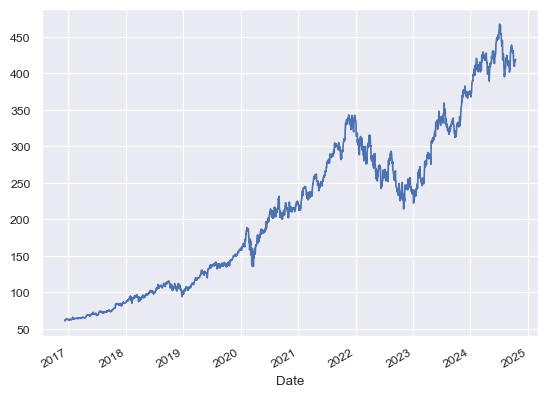

In [10]:
df_MSFT_LINKEDIN['change_tomorrow_direction'] = np.where(df_MSFT_LINKEDIN.change_tomorrow > 0, 'Up', 'Down')
df_MSFT_LINKEDIN.change_tomorrow_direction.value_counts()
df_MSFT_LINKEDIN.Close.plot()